<a href="https://colab.research.google.com/github/SRIDEVIMP/SRIDEVIMP/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARDIOVASCULAR DISEASE PREDICTION**

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Cholestrol, ...). We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these 2 criteria - Supervised Learning plus Claqssification and Regression, we can narrow down our choice of models to a few. (KNN, Naive Bayes, Neural Network, etc.)

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset

In [ ]:
data=pd.read_csv("cardio_train[1].csv", sep=";")

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0




1.  id: Id number of individuals.
2.  age: Age of individuals.
3.  gender: Gender of individuals.
4.  height: Height of individuals.
5.  weight: Weight of individuals.
6.  ap_hi: Systolic blood pressure.
7.  ap_lo: Diastolic blood pressure.
8.  cholestrol: Cholesterol level.
9.  gluc: Glucose level.
10. smoke: Smoking status.
11. alco: Alcohol consumption status.
12. active: Physical activity status.
13. cardio: Presence of cardiovascular disease.



In [ ]:
data.shape

(70000, 13)

In [ ]:
data.drop("id",axis=1,inplace = True)

In [ ]:
data.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [ ]:
data['age']=data['age']//365

In [ ]:
data.head(4)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1


In [ ]:
data['bmi']=data['weight']/(data['height']/100)**2

In [ ]:
data.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [ ]:
data.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


Modelling

In [ ]:
X=data.drop(['cardio'],axis=1)
y=data['cardio']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
43395,62005,64,1,154,76.0,120,80,3,1,0,0,1,32.045876
34399,49152,53,1,143,55.0,110,80,1,1,0,0,1,26.896181


In [ ]:
X_test.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
10840,15505,41,1,165,61.0,120,80,1,1,0,0,1,22.405877
56267,80282,54,1,164,54.0,110,80,1,1,0,0,1,20.077335


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_y_pred=logreg.predict(X_test)
log_y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#accuracy
acc_log=round(logreg.score(X_test,y_test)*100,2)
acc_log

69.61

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix

In [ ]:
log_cf_matrix=confusion_matrix(y_test,log_y_pred)
log_cf_matrix

array([[5129, 1940],
       [2314, 4617]])

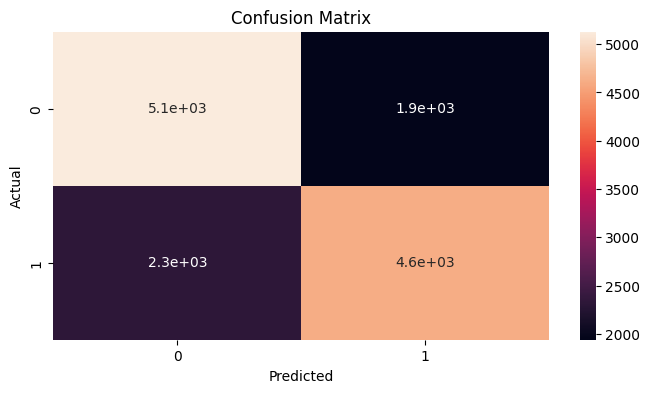

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(log_cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#example

test=pd.DataFrame({
    'age':[24],
    'gender':[1],
    'height':[150],
    'weight':[47.0],
    'ap_hi':[110],
    'ap_lo':[70],
    'cholesterol':[2],
    'gluc':[1],
    'smoke':[0],
    'alco':[1],
    'active':[0]
})

In [ ]:
test['bmi']=test['weight']/(test['height']/100)**2

In [ ]:
result_pred=logreg.predict(test)
if result_pred==0:
    print("Result is Negative")
else:
    print("Result is Positive")

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_y_pred =knn.predict(X_test)
knn_y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
acc_knn = round(knn.score(X_train, y_train) *100, 2)
print (acc_knn)

81.58


In [ ]:
for i in range(1,266,2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  acc_knn = round(knn.score(X_train, y_train) *100, 2)
  print ("n_neighbor",i, " : ", "Accuracy is ", acc_knn)


n_neighbor 1  :  Accuracy is  97.82
n_neighbor 3  :  Accuracy is  81.58
n_neighbor 5  :  Accuracy is  78.01
n_neighbor 7  :  Accuracy is  76.49
n_neighbor 9  :  Accuracy is  75.75
n_neighbor 11  :  Accuracy is  75.24
n_neighbor 13  :  Accuracy is  74.81
n_neighbor 15  :  Accuracy is  74.54
n_neighbor 17  :  Accuracy is  74.31
n_neighbor 19  :  Accuracy is  74.15
n_neighbor 21  :  Accuracy is  73.99
n_neighbor 23  :  Accuracy is  73.95
n_neighbor 25  :  Accuracy is  73.84
n_neighbor 27  :  Accuracy is  73.68
n_neighbor 29  :  Accuracy is  73.49
n_neighbor 31  :  Accuracy is  73.45
n_neighbor 33  :  Accuracy is  73.42
n_neighbor 35  :  Accuracy is  73.36
n_neighbor 37  :  Accuracy is  73.29
n_neighbor 39  :  Accuracy is  73.26
n_neighbor 41  :  Accuracy is  73.25
n_neighbor 43  :  Accuracy is  73.28
n_neighbor 45  :  Accuracy is  73.18
n_neighbor 47  :  Accuracy is  73.21
n_neighbor 49  :  Accuracy is  73.18
n_neighbor 51  :  Accuracy is  73.14
n_neighbor 53  :  Accuracy is  73.17
n_neig

In [ ]:
knn_cf_matrix=confusion_matrix(y_test,knn_y_pred)
knn_cf_matrix

array([[5141, 1928],
       [3074, 3857]])

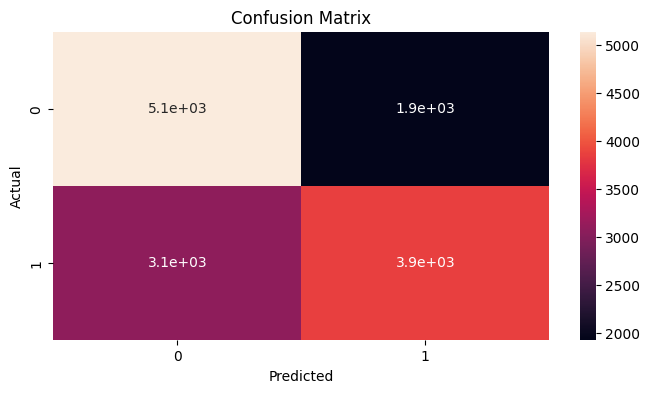

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(knn_cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb_y_pred= gnb.predict(X_test)
gnb_y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
acc_gnb = round(gnb.score(X_train, y_train) *100, 2)
print (acc_gnb)

59.52


In [ ]:
gnb_cf_matrix=confusion_matrix(y_test,gnb_y_pred)
gnb_cf_matrix

array([[6232,  837],
       [4817, 2114]])

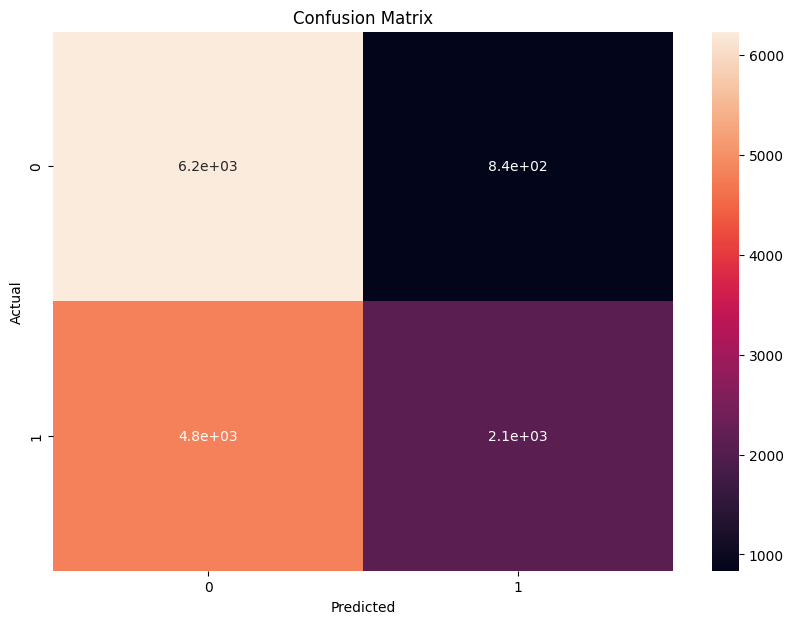

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(gnb_cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dec_clf_y_pred = dec_clf.predict(X_test)
dec_clf_y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
acc_decision_tree = round(dec_clf.score(X_train, y_train) *100, 2)
print (acc_decision_tree)

98.07


In [ ]:
dec_clf_cf_matrix=confusion_matrix(y_test,dec_clf_y_pred)
dec_clf_cf_matrix

array([[4540, 2529],
       [2582, 4349]])

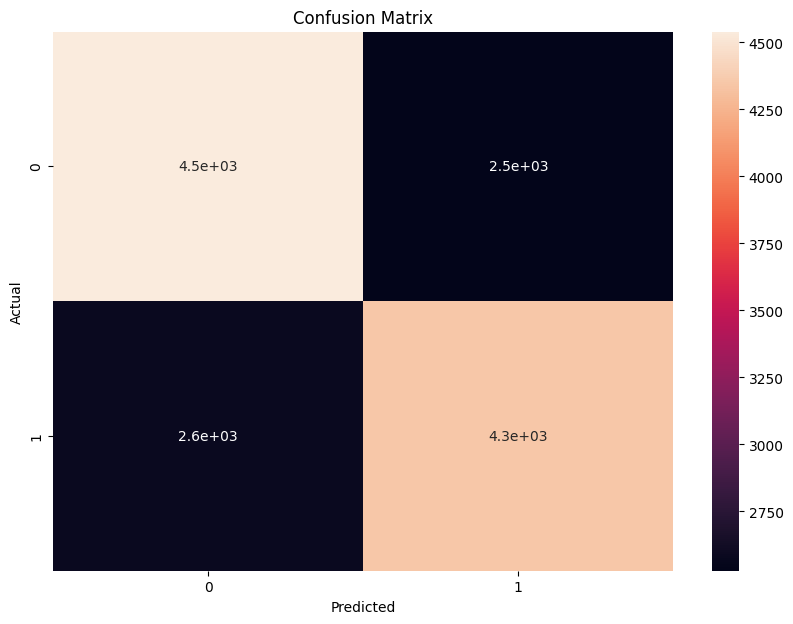

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(dec_clf_cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier(n_estimators=200)
rand_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [ ]:
rand_y_pred = rand_clf.predict(X_test)
rand_y_pred


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
acc_random_forest = round(rand_clf.score(X_train, y_train) *100,2)
print (acc_random_forest)

98.07


In [ ]:
rand_cf_matrix=confusion_matrix(y_test,rand_y_pred)
rand_cf_matrix

array([[5086, 1983],
       [2075, 4856]])

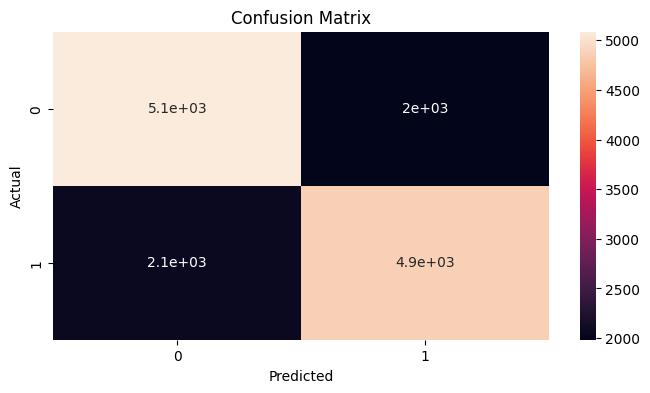

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(rand_cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score


In [ ]:
#split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
def build_ann(optimizer='adam'):

    # Initializing the ANN
    ann = Sequential()

    # Adding the input layer and the first hidden layer of the ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(len(X_train.columns),)))

    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))

    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return ann

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
ann = build_ann(opt)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = ann.fit(Xtrain, Ztrain, batch_size=16, epochs=100, validation_data=(Xval, Zval))

Epoch 1/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5940 - loss: 1.7942 - val_accuracy: 0.6773 - val_loss: 0.6392
Epoch 2/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6604 - loss: 0.6404 - val_accuracy: 0.6949 - val_loss: 0.6258
Epoch 3/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6763 - loss: 0.6155 - val_accuracy: 0.6827 - val_loss: 0.6377
Epoch 4/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6867 - loss: 0.6061 - val_accuracy: 0.7106 - val_loss: 0.6015
Epoch 5/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6985 - loss: 0.5959 - val_accuracy: 0.7168 - val_loss: 0.6078
Epoch 6/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6971 - loss: 0.5910 - val_accuracy: 0.6870 - val_loss: 0.6042
Epoch 7/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7059 - loss: 0.5846 - val_accuracy: 0.6973 - val_loss: 0.5921
Epoch 8/100
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7066 - loss: 

KeyboardInterrupt: 

In [ ]:
# Predicting the Train set results
ann_prediction = ann.predict(X_train)
ann_prediction = (ann_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_ann1 = round(accuracy_score(y_train, ann_prediction) * 100, 2)
acc_ann1

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


50.91